<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6>Assumptions of Ordinary Least Squares</font></h1>
<h2 align=center><font size = 5>Lab Exercise 2.5</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this example, the previously used two datasets (from Exercise 2.3 and 2.4) will be used to check whether the seven assumptions of the Ordinary Least Squares (OLS) were fulfilled by our data. Remember, OLS was used to derive the parameters $w$ and $b$ for our simple linear regression. <br>
**Note**: *The Galton's family dataset was taken from the **Hist** package of the R language. The *Height vs. Weight* dataset can be found at http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights.*

### Table of contents
1. [The regression model is linear in the coefficients](#OLS-1)
2. [The error term of the population has zero mean](#OLS-2)
3. [All independent variables are uncorrelated with the error term](#OLS-3)
4. [The error terms are uncorrelated with each other](#OLS-4)
5. [The error term has a constant variance](#OLS-5)
6. [No independent variable is a perfect linear function of other explanatory variables](#OLS-6)
7. [The error term is normally distributed (optional)](#OLS-7)

Before starting checking the assumptions of OLS, let's import the required libraries and set inline drawing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

Read both the *GaltonFamilies.csv* and *HeightWeightSample.csv* files into pandas dataframes. Extract the input and output values from the pandas dataframes into vectors $\mathbf{x}_1$ and $\mathbf{y}_1$ for blood pressure vs. age, and into vectors $\mathbf{x}_2$ and $\mathbf{y}_2$ for weight vs. height. Also extract the number of observations available in the data sets.

In [2]:
data1 = pd.read_csv(os.path.join('data','GaltonFamilies.csv'))
data2 = pd.read_csv(os.path.join('data','HeightWeightSample.csv'))
x1_=np.array(data1["midparentHeight"])[:,np.newaxis]
y1_=np.array(data1["childHeight"])[:,np.newaxis]
N1,_=data1.shape
x2_=np.array(data2["Height(Inches)"])[:,np.newaxis]
y2_=np.array(data2["Weight(Pounds)"])[:,np.newaxis]
N2,_=data2.shape
print("Number of observarions in Galton's families: ",N1)
print("Number of observarions in height vs. weight: ",N2)

Number of observarions in Galton's families:  934
Number of observarions in height vs. weight:  200


## 1. The regression model is linear in the coefficients <a name="OLS-1"></a>

A regression model is linear when all terms in the model are additive, thus we have the form of: <br>
$y=\beta_0+\beta_1\cdot x +\epsilon$

If you fit your linear model to data that acts nonlinearly or nonadditive, your predictions are likely to be seriously in error. Let's define some useful functions:

In [3]:
def ModelParam(x_,y_):
    w=np.sum((y_-y_.mean())*(x_-x_.mean()))/np.sum((x_-x_.mean())**2)
    b=y_.mean()-w*x_.mean()
    return (b,w)
def f(x_,w,b):
    return w*x_+b

Let's, calculate the parameters of the simple linear regressions and the residuals:

In [4]:
b1,w1=ModelParam(x1_,y1_)
b2,w2=ModelParam(x2_,y2_)
r1_=y1_-f(x1_,w1,b1)
r2_=y2_-f(x2_,w2,b2)

Then make the scatter plot together with the estimated linear regression lines for both data sets. At the same, time create the scatter plot of the residuals.

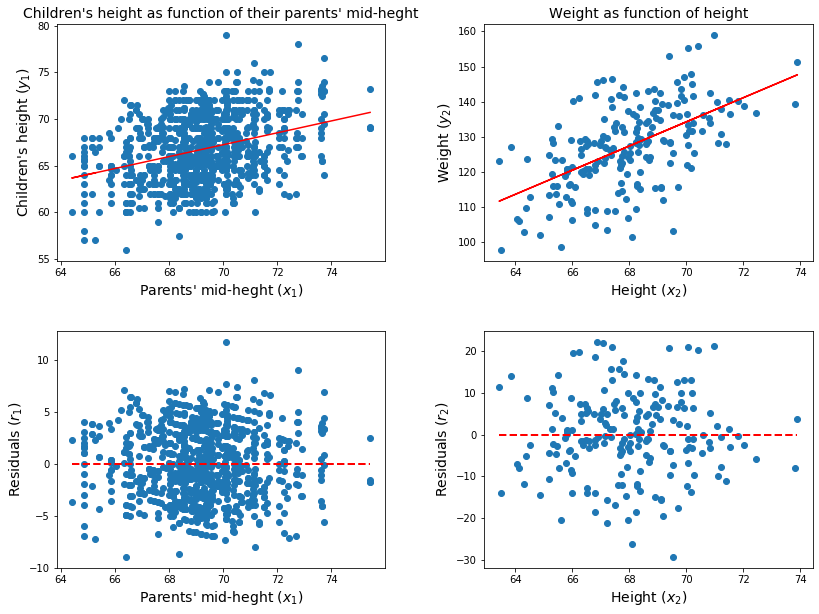

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace=0.3)
ax[0,0].scatter(x1_,y1_)
ax[0,0].plot(x1_,f(x1_,w1,b1),'r')
ax[1,0].scatter(x1_,r1_)
ax[1,0].plot([x1_.min(),x1_.max()],[0,0],'--r',lw=2)
ax[0,1].scatter(x2_,y2_)
ax[0,1].plot(x2_,f(x2_,w2,b2),'r')
ax[1,1].scatter(x2_,r2_)
ax[1,1].plot([x2_.min(),x2_.max()],[0,0],'--r',lw=2)
ax[0,0].set_title("Children's height as function of their parents' mid-heght",fontsize=14)
ax[0,0].set_xlabel("Parents' mid-heght ($x_1$)",fontsize=14)
ax[0,0].set_ylabel("Children's height ($y_1$)",fontsize=14)
ax[1,0].set_xlabel("Parents' mid-heght ($x_1$)",fontsize=14)
ax[1,0].set_ylabel('Residuals ($r_1$)',fontsize=14)
ax[0,1].set_title("Weight as function of height",fontsize=14)
ax[0,1].set_xlabel('Height ($x_2$)',fontsize=14)
ax[0,1].set_ylabel('Weight ($y_2$)',fontsize=14)
ax[1,1].set_xlabel('Height ($x_2$)',fontsize=14)
ax[1,1].set_ylabel('Residuals ($r_2$)',fontsize=14)
plt.show()

Nonlinearity is usually most evident in a plot of residuals versus a horizontal line corresponding to zero residual (shown above). Looking at both pairs of scatter plots, the assumption of the linear relationship between the input and output is feasible. <br>
To see a counter-example, let's generate synthetic data which follows a quadratic function:

In [6]:
np.random.seed(1)
x_=5*np.random.randn(100)      # Create random values for input
e_=10*np.random.randn(100)     # Create an error with normal distribution with sigma=10
y_=x_**2+e_                    # Make the output to depend on the square of x plus the error term
b,w=ModelParam(x_,y_)
r_=y_-(w*x_+b)

Then create the scatter plot of both the observations and residuals, as we did before with the real datasets.

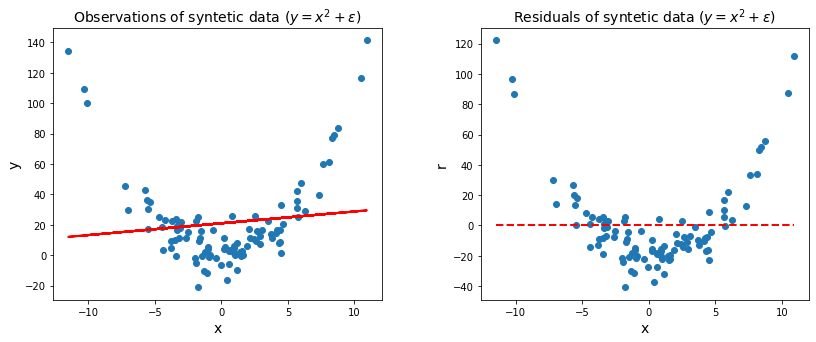

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace=0.3)
ax[0].scatter(x_,y_)
ax[0].plot(x_,w*x_+b,'r',lw=2)
ax[1].scatter(x_,r_)
ax[1].plot([x_.min(),x_.max()],[0,0],'--r',lw=2)
ax[0].set_title("Observations of syntetic data ($y=x^2+\epsilon$)",fontsize=14)
ax[0].set_xlabel("x",fontsize=14)
ax[0].set_ylabel("y",fontsize=14)
ax[1].set_title("Residuals of syntetic data ($y=x^2+\epsilon$)",fontsize=14)
ax[1].set_xlabel("x",fontsize=14)
ax[1].set_ylabel("r",fontsize=14)
plt.show()

We can observe from the figure on the left that the estimated regression line does not fit well at all on the observations. The figure on the right shows that residuals in the middle are mostly negative, while residuals at both ends are mostly positive. This is a clear indication that our linear model does not do a good job, and a non-linear model shall be applied instead.

## 2. The error term of the population has zero mean <a name="OLS-2"></a>

The error term accounts for the variation in the dependent variable that the independent variables do not explain. Random chance should determine the values of the error term. For your model to be unbiased, the average value of the error term must equal zero. <br>
In the case of the sample, the mean of the population error is not known. That is estimated by the residuals, which sum is always zero by the constraint done for OLS (see Chapter 2 of the book).

In [8]:
print("Sum of residuals for the first model:",np.sum(r1_))
print("Sum of residuals for the second model:",np.sum(r2_))

Sum of residuals for the first model: 1.0871303857129533e-11
Sum of residuals for the second model: -7.958078640513122e-13


Now, let's check for the synthetic data, which generated using a population error with nonzero mean.

In [9]:
x_=5*np.random.randn(100)       # Create random values for input
e_=10*np.random.randn(100)+30   # Create an error with normal distribution with sigma=10 and mean = 30
beta1=3
beta0=2
y_=beta1*x_+beta0+e_            # Make the output to depend on the square of x plus the error term
b,w=ModelParam(x_,y_)
r_=y_-(w*x_+b)
print("Sum of residuals for the syntetic data with nonzero population mean:",np.sum(r_))

Sum of residuals for the syntetic data with nonzero population mean: -6.039613253960852e-13


We can see that even if the population of the error has a nonzero mean, the sum of residuals is still zero as the result of the OLS constraints. Now, let's see the estimated coefficients.

In [10]:
print("Population mean of the error:",e_.mean())
print("True beta1=%f vs. estimated w=%f"%(beta1,w))
print("True beta0=%f vs. estimated b=%f"%(beta0,b))

Population mean of the error: 29.796375308336334
True beta1=3.000000 vs. estimated w=2.888486
True beta0=2.000000 vs. estimated b=31.801852


As can be observed, the true parameters of the population are not estimated correctly. The most significant difference can be seen for the intercept term. However, if the intercept term is not in the scope of our analysis, then this should be a minor problem.

## 3. All independent variables are uncorrelated with the error term <a name="OLS-3"></a>

If an independent variable correlated with the error term, we can use the independent variable to predict the error term. However, that violates the notion of unpredictable, random error. Thus, we need to find a way, to incorporate that information into the regression model itself, otherwise, coefficients are biased. In the case of simple linear regression, there is only one independent variable. So, let's generate synthetic data with given population attributes and with an error correlated to the input.

In [11]:
beta0=5
beta1=1.5
x_=5*np.random.randn(100)       # Create random values for input
e_=2*x_+10*np.random.randn(100) # Create an error with normal distribution with sigma=10 which is correlated also with x
y_=beta0+beta1*x_+e_

Then apply the linear regression model and calculate the model parameters.

In [12]:
b,w=ModelParam(x_,y_)
print("Intercept of the model is:",b)
print("Slope of the model is:",w)

Intercept of the model is: 6.197793563570059
Slope of the model is: 3.680598274295738


As can be observed, the slope of the model is a biased estimate for the $\beta_1$ population attribute.

## 4. The error terms are uncorrelated with each other <a name="OLS-4"></a>

Checking the scatter plot of the residuals for the two datasets discussed previously, we can observe that they spread around 0 without any cyclical pattern. Another method of checking the autocorrelation is the usage of Durbin-Watson statistics. When there is no serial correlation (autocorrelation), the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic is, the more evidence for positive serial correlation exists. The closer to 4, the more evidence for negative serial correlation.

$d_{DW}=\frac{\sum_{i=2}^{N}(r^{(i)}-r^{(i-1)})^2}{\sum_{i=1}^{N}(r^{(i)})}$

Then we test for no autocorrelation:
- Null hypothesis ($H_0$): if $d_U\leq d_{DW} \leq 4-d_U$ accept that there is no autocorrelation
- Alternative hypothesis ($H_1$): if $d_{DW}\leq d_L$ or $d_{DW}\geq 4-d_L$ reject $H_0$ because there is (a positive, respective a negative) autocorrelation

Note: If $d_L<d_{DW}<d_U$ or $4-d_U<d_{DW}<4-d_L$ the test is inconclusive. The $d_L$ and $d_U$ values can be found here: https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf.

Let's define the function for calculating the $d_{DW}$ value.

In [13]:
def DW(r_):
    N=len(r_)
    rlag_=np.zeros((N,1))
    rlag_[1:,0]=r_[0:-1,0]
    rlag_[0,0]=r_[0,0]
    d=np.sum((r_-rlag_)**2)/np.sum(r_**2)
    return d

Then check for autocorrelation in the two real datasets. 

In [14]:
print("The Durbin-Watson statistic for Galton's families: d_DW =",DW(r1_))
print("The Durbin-Watson statistic for height vs. weight: d_DW =",DW(r2_))

The Durbin-Watson statistic for Galton's families: d_DW = 1.385915573373562
The Durbin-Watson statistic for height vs. weight: d_DW = 2.020844604606741


For the *Galton's families* dataset the lower and upper limits are $d_L=1.758$, respective $d_U=1.779$ for $k=1$, $N=934$, and $\alpha=0.05$ (The table contains values for up to N=200, so we use that row). Because the value of $d_{DW}=1.38 < d_L=1.758$, we cannot reject the null hypothesis (there is autocorrelation of lag 1).

For the *Height vs. weight* dataset the lower and upper limits are $d_L=1.758$, respective $d_U=1.779$ for $k=1$, $N=200$, and $\alpha=0.05$. Beacuse the value of $d_{DW}=2.02 > d_U=1.779$, we accept the null hypothesis (no autocorrelation).

We can also use the Durbin-Watson statistic from the *statsmodels* library to obtain the same results.

In [15]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(r1_)[0])
print(durbin_watson(r2_)[0])

1.3859155733735617
2.020844604606741


In conclusion, according to Durbin-Watson test, the residuals - as the estimate of the true error terms - have an autocorrelation of lag 1 in *GaltonsFamilies* dataset.

**Note:** *Because one of the OLS assumptions is broken, the Gauss Markov theorem does not apply, and OLS estimators are no longer the Best Linear Unbiased Estimators (BLUE) for the true population coefficients.  Although the estimated coefficients are unbiased (the long-run average of the estimation over several random samples represents the true coefficient), the estimated variance of the parameters is lower than in reality. Thus, we cannot build reliable confidence and prediction intervals (see in later exercises). The possible reason for autocorrelated errors is that our model is not correctly specified, and some important input variables are missing.*

Possible reason is that our model is not correctly specified and some important input variables are missing. In Example 1 we already had a summary of the OLS model fit, let's create here again using also the gender predictor. For comparison, the summary for OLS without gender is also provided first. At this time you should not bother interpreting all the values in the summary table. With later exercises we will discuss one-by-one each of these.

In Example 1 we already had a summary of the OLS model fit, let's create here again using also the gender predictor. For comparison, the summary for OLS without gender is also provided first. Again, at this time you should not bother interpreting all the values in the summary table. With later exercises, we will discuss one-by-one each of these. In Example 1 we already had a summary of the OLS model fit, let's create here again using also the gender predictor. For comparison, the summary for OLS without gender is also provided first. Again, at this time you should not bother interpreting all the values in the summary table. With later exercises, we will discuss one-by-one each of these.

In [16]:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import acorr_ljungbox
model = ols(formula = 'childHeight ~ midparentHeight', data=data1).fit()
print(model.summary(title="Linear regression model: childHeight ~ midparentHeight"))
statistic=acorr_ljungbox(model.resid,1,boxpierce=True)
print("\nLjung–Box test statistic",statistic[0][0])
print("Ljung–Box test p-value",statistic[1][0])
print("Box-Pierce test statistic",statistic[2][0])
print("Box-Pierce test p-value",statistic[3][0])
print('\n\n')
model = ols(formula = 'childHeight ~ midparentHeight + C(gender)', data=data1).fit()
print(model.summary(title="Linear regression model: childHeight ~ midparentHeight + gender"))
statistic=acorr_ljungbox(model.resid,1,boxpierce=True)
print("\nLjung–Box test statistic",statistic[0][0])
print("Ljung–Box test p-value",statistic[1][0])
print("Box-Pierce test statistic",statistic[2][0])
print("Box-Pierce test p-value",statistic[3][0])
print()

            Linear regression model: childHeight ~ midparentHeight            
Dep. Variable:            childHeight   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           8.05e-24
Time:                        07:34:22   Log-Likelihood:                -2465.0
No. Observations:                 934   AIC:                             4934.
Df Residuals:                     932   BIC:                             4944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          22.6362      4.265     

As can be seen from the summary above, the Durbin-Watson statistic increased from the previous 1.386 value to 1.54. But, the value is still below 1.758, so we might suspect that there is still one missing predictor not included in the dataset.

However, the Durbin-Watson statistic is obsolete. It is included in most statistical software because it was one of the first tests for autocorrelation, and it has just stayed around. The Ljung–Box test or Box-Pierce test shall be used instead (discussed in more detail in Chapter 4). The test results with statistics and p-values can be seen under the summary table. Because the p-values are well below 0.05, we conclude that there is no correlation among errors.

## 5. The error term has a constant variance <a name="OLS-5"></a>

We can use the Goldfeld–Quandt test to check for heteroscedasticity. For this reason, first, we order the dataset according to the independent variable $x$, then divide the original dataset into two equal parts, leaving out the middle 20% (by omitting the central range, you increase the contrast between the variances of the residuals, and you have a better chance of rejecting the null hypothesis of homoscedasticity). Finally, fit the linear model separately on these two subsets and compare the variances with F-test. Let's create the function for this test.

In [17]:
from scipy import stats
def GoldfeldQuandt(x_,y_):
    index=np.argsort(x_,axis=0)
    N,_=x_.shape
    low=N//2-N//10
    high=N//2+N//10
    x1_=x_[np.ravel(index[:low])]
    y1_=y_[np.ravel(index[:low])]
    x2_=x_[np.ravel(index[high:])]
    y2_=y_[np.ravel(index[high:])]
    b1,w1=ModelParam(x1_,y1_)
    b2,w2=ModelParam(x2_,y2_)
    RSS1=np.sum((y1_-f(x1_,w1,b1))**2)
    RSS2=np.sum((y2_-f(x2_,w2,b2))**2)
    df1,_=x1_.shape
    df1-=2
    df2,_=x2_.shape
    df2-=2
    Ftest=(RSS2/df2)/(RSS1/df1)
    pvalue=stats.f.sf(Ftest,1,df1)
    return (RSS1,RSS2,Ftest,pvalue)

And apply this test on the *Galton's families* dataset:

In [18]:
print("RSS for low values and high values of x is:",GoldfeldQuandt(x1_,y1_)[:2])
print("Ftest and the corresponding p-value is:",GoldfeldQuandt(x1_,y1_)[2:])

RSS for low values and high values of x is: (4083.1634404940964, 4386.984710217603)
Ftest and the corresponding p-value is: (1.0744083047742858, 0.30062513884580655)


The p-value is greater than 0.05, thus we cannot reject the null hypothesis that the variance is equal for the two subgroups. As such, the variance is constant for the residuals, which estimate the true errors. Now, let's apply this test for the *HeightWeight* dataset.

In [19]:
print("RSS for low values and high values of x is:",GoldfeldQuandt(x2_,y2_)[:2])
print("Ftest and the corresponding p-value is:",GoldfeldQuandt(x2_,y2_)[2:])

RSS for low values and high values of x is: (7639.77137289167, 7479.79842348521)
Ftest and the corresponding p-value is: (0.9790605056619764, 0.3254904412280517)


The same conclusion can be drawn, the variance is the same for the two subgroups, thus the variance is constant for the residuals, which are the estimate of the true error. Now, let's take a counter-example using synthetic data where the random error term absolute value increases as $x$ increases.

In [20]:
np.random.seed(seed=100)
x_=np.linspace(0,100,50)[:,np.newaxis]
e_=np.array([np.random.normal(scale=std) for std in np.linspace(3,30,50)])[:,np.newaxis]
y_=100+x_+e_
b,w=ModelParam(x_,y_)
r_=y_-(w*x_+b)
print("RSS for low values and high values of x is:",GoldfeldQuandt(x_,y_)[:2])
print("Ftest and the corresponding p-value is:",GoldfeldQuandt(x_,y_)[2:])

RSS for low values and high values of x is: (776.8457445093858, 13956.162937104093)
Ftest and the corresponding p-value is: (17.9651662324778, 0.0004940789453538034)


Because the p-value is well below 0.05, we can reject the null hypothesis that the variance of the two subgroups is equal. Thus, the error variance is not constant, and we have the problem of heteroscedasticity. We can make a scatter plot to see it visually. 

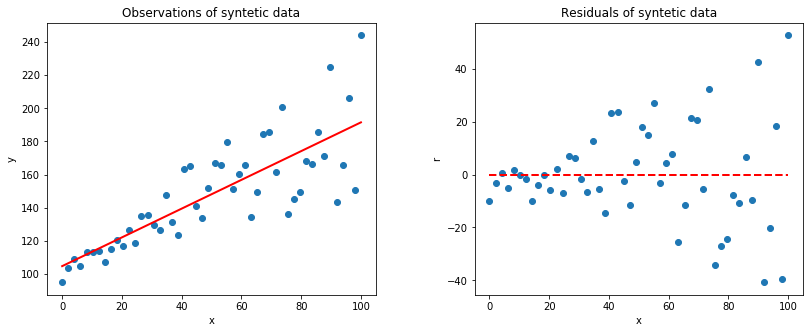

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace=0.3)
ax[0].scatter(x_,y_)
ax[0].plot(x_,w*x_+b,'r',lw=2)
ax[1].scatter(x_,r_)
ax[1].plot([x_.min(),x_.max()],[0,0],'--r',lw=2)
ax[0].set_title("Observations of syntetic data")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_title("Residuals of syntetic data")
ax[1].set_xlabel("x")
ax[1].set_ylabel("r")
plt.show()

We can perceive visually, that as $x$ becomes greater, the higher the values of the residuals.

## 6. No independent variable is a perfect linear function of other explanatory variables <a name="OLS-6"></a>

Multicollinearity problem arises only to multiple linear regressions, like the *Galton's families*, using all the independent variables. This will be discussed only in Chapter 3 of the book, here, we just make a very brief checking using the *variance_inflation_factor* from *statsmodels* library. For this reason, a matrix from the dataset is created where each column corresponds to an input variable (*Cat* column containing binary values corresponding to gender male=1, female=0 will be used).

In [22]:
data1['Cat'] = data1.apply(lambda row: 1 if row.gender=='male' else 0, axis=1)
X=np.array(data1[["father","mother","midparentHeight","Cat"]])

Then import the method from *statsmodels* library and calculate the VIF for each independent variable.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print("VIF for father =",variance_inflation_factor(X,0))
print("VIF for mother =",variance_inflation_factor(X,1))
print("VIF for midparentHeight =",variance_inflation_factor(X,2))
print("VIF for gender (Cat) =",variance_inflation_factor(X,3))

VIF for father = inf
VIF for mother = inf
VIF for midparentHeight = inf
VIF for gender (Cat) = 2.0565499841139965


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


As can be seen, the VIF values for *father*, *mother*, and *midparentHeight* are infinite, indicating that there is very strong multicollinearity among these variables. This should be no surprise as the midparentHeight is the average of mother's and father's height. Let's remove the *midparentHeight* input variable and see the VIF values.

In [24]:
X=np.array(data1[["father","mother","Cat"]])
print("VIF for father =",variance_inflation_factor(X,0))
print("VIF for mother =",variance_inflation_factor(X,1))
print("VIF for gender (Cat) =",variance_inflation_factor(X,2))

VIF for father = 417.4530726268828
VIF for mother = 417.44150081897106
VIF for gender (Cat) = 2.0565499841139965


The VIF values indicate that there is still some collinearity issue between the height of mother and father. That should not be a surprise as height is also taken into account when choosing a couple. Now, let's check the VIF values using the *midparentHeight* input variable instead of *father* and *mother*.

In [25]:
X=np.array(data1[["midparentHeight","Cat"]])
print("VIF for midparentHeight =",variance_inflation_factor(X,0))
print("VIF for gender (Cat) =",variance_inflation_factor(X,1))

VIF for midparentHeight = 2.0565498239316145
VIF for gender (Cat) = 2.056549823931614


The VIF values are well below 5, so we can conclude that there is no multicollinearity among input variables *midparentheight* and *gender*.

We can use the condition number to check for (multi)collinearity. The condition number is calculated as the square root of the ratio of the largest to smallest eigenvalue. As a rule of thumb, when the condition number is above 30, some collinearity issues may be present.

In [26]:
from numpy.linalg import eigh
Xdot=np.insert(X,0,np.ones(N1),axis=1)
eigval,eigvect=eigh(Xdot.T@Xdot)
print("Eigenvalues of the product matrix:")
print(eigval[:,np.newaxis])
print("Condition number =",np.sqrt(eigval.max()/eigval.min()))

Eigenvalues of the product matrix:
[[6.29886693e-01]
 [2.33876163e+02]
 [4.47767670e+06]]
Condition number = 2666.2148920013497


You may also use the *cond* method of scipy library directly to calculate the condition number:

In [27]:
from numpy.linalg import cond
print(cond(Xdot))

2666.2148923846958


The condition number is also provided in the right bottom corner of the OLS summary provided by the *statmodels* library (see " Cond. No." in the report above titled "OLS Regression Results"). Because condition number is above $10^3$ statsmodels provides a written warning below the table.

## 7. The error term is normally distributed (optional) <a name="OLS-7"></a>

OLS does not require that the error term follows a normal distribution to produce unbiased estimates with the minimum variance. However, satisfying this assumption allows you to perform statistical hypothesis testing (like we already did in this exercise) and generate reliable confidence intervals and prediction intervals (see Exercise 2.7).

First, make the histogram plot of the residuals for the *GaltonsFamilies*, respective *WeightHeight* datasets:

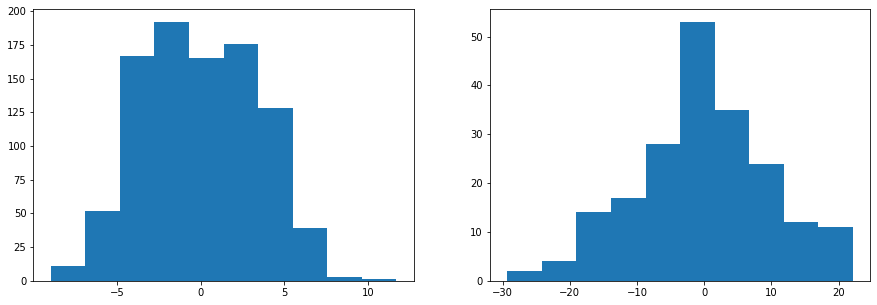

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(r1_)
ax[1].hist(r2_)
plt.show()

The histograms resemble a normal distribution. 

A Normal probability plot of the residuals (also called QQ-plot) can be also used to check the normality assumption and is a graphical technique to identify substantive departures from normality. It is based on the comparison between the observed distribution and the theoretical normal distribution. The null hypothesis is rejected (i.e. (data does not come from a normal distribution) if the points are not aligned on a straight line. 

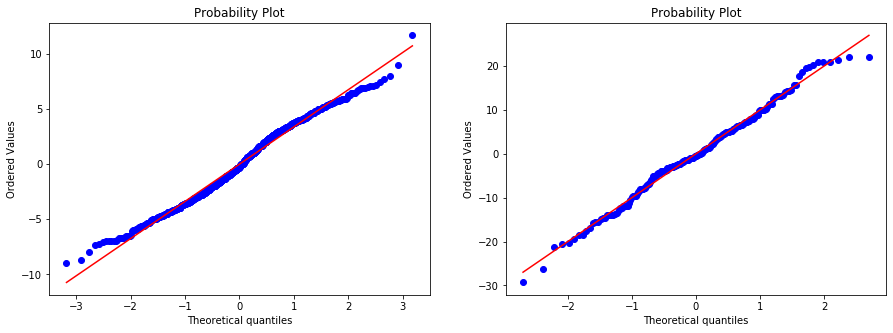

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
result=stats.probplot(np.ravel(r1_), plot=ax[0])
result=stats.probplot(np.ravel(r2_), plot=ax[1])
plt.show()

The QQ-plot shows that data comes from normal distribution in both cases.

Now, let's see a counterexample like the blood pressure vs. age discussed in Example 3. We can keep the *WeightHeight* dataset for comparison.

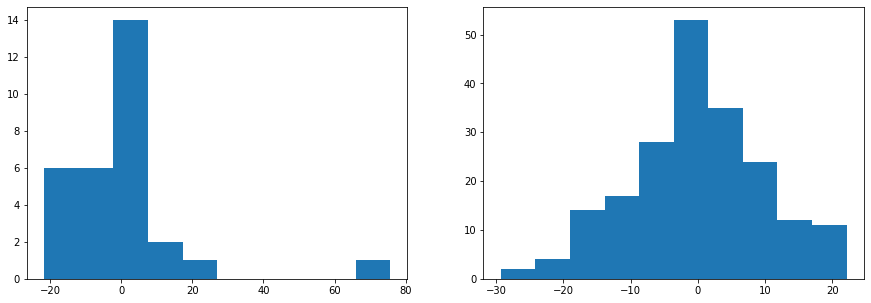

In [30]:
data1 = pd.read_csv(os.path.join('data','BloodpressureAge.csv'))
x1_=np.array(data1["Age"])[:,np.newaxis]
y1_=np.array(data1["Systolic blood pressure"])[:,np.newaxis]
b1,w1=ModelParam(x1_,y1_)
r1_=y1_-f(x1_,w1,b1)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(r1_)
ax[1].hist(r2_)
plt.show()

Now, the plot on the left, corresponding to the blood pressure vs. age dataset, does not resemble a normal distribution. Check the normality with QQ-plot.

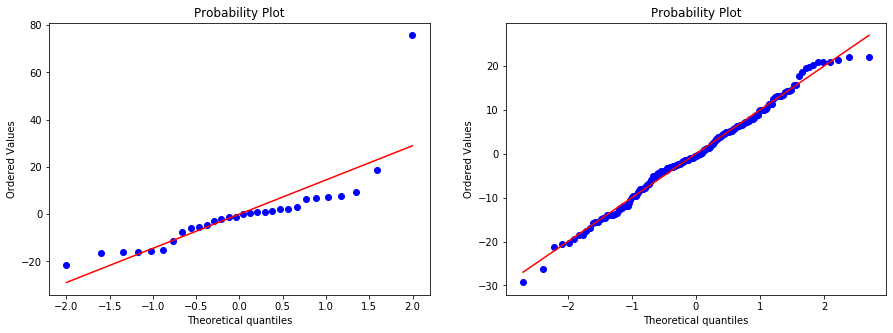

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
result=stats.probplot(np.ravel(r1_), plot=ax[0])
result=stats.probplot(np.ravel(r2_), plot=ax[1])
plt.show()

The residuals on the left, corresponding to the blood pressure vs. age dataset, are not lying on the straight line. Especially, there is a point which is far away from the straight line (we will discuss this in Exercise 2.6). The residuals on the right, corresponding to the weight vs. height data set, lie on the straight line, so we can be confident that the errors follow a normal distribution. 

We can also check for normality using the Jarque-Bera statistic introduced in the book.

In [32]:
def JarqueBera(x_):
    N=float(x_.size)
    diffx=x_-x_.mean()
    S=(1/N*np.sum(diffx**3))/(1/N*np.sum(diffx**2))**(3/2.)
    K=(1/N*np.sum(diffx**4))/(1/N*np.sum(diffx**2))**2
    JB=N/6*(S**2+(K-3)**2/4)
    p=1-stats.distributions.chi2.cdf(JB, 2)
    return JB,p
print("ChiSquare and p-value for blood pressure vs. age:",JarqueBera(r1_))
print("ChiSqaure and p-value for weight vs. height:",JarqueBera(r2_))

ChiSquare and p-value for blood pressure vs. age: (200.60701454362882, 0.0)
ChiSqaure and p-value for weight vs. height: (0.19918080320428622, 0.9052081139057426)


As we expected, the p-value for blood pressure vs. age is 0, indicating that we can reject the null hypothesis that this data comes from a normal distribution. On the other hand, the p-value for the weight vs. height is greater than 0.05, so we cannot reject the null hypothesis, suggesting that this data come from a normal distribution.

We can use the *jargue_bera* method of the *scipy* library to obtain the same results.

In [33]:
from scipy.stats import jarque_bera
print(jarque_bera(r1_))
print(jarque_bera(r2_))

(200.60701454362882, 0.0)
(0.19918080320428622, 0.9052081139057426)


<img src = "images/AML1-Cover.png" width = 90, align = "left" style="margin:0px 20px">

**Note:** This Jupyter Notebook is accompanying the book: <br><i>"Machine Learning - From Theory to Practice with NumPy and scikit-learn, Volume 1: Generalized Linear Models"</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).